[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/marmalux/portafolio_ciencia_datos/blob/main/AluraStoreLatam.ipynb)


### Importación de datos



In [86]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda4.head(3)

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Lavavajillas,Electrodomésticos,1084800.0,56000.0,11/11/2022,Rafael Acosta,Bogotá,4,Tarjeta de crédito,3,4.60971,-74.08175
1,Cama box,Muebles,473800.0,25400.0,03/01/2020,Izabela de León,Cúcuta,5,Tarjeta de crédito,2,7.89391,-72.50782
2,Balón de baloncesto,Deportes y diversión,23700.0,0.0,25/12/2022,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


# Vistazo a los datos

Se hace un proceso de limpieza de datos, datos nulos (sin datos nulos)

In [ ]:
nulos1 = tienda.isnull().sum()
nulos2 = tienda2.isnull().sum()
nulos3 = tienda3.isnull().sum()
nulos4 = tienda4.isnull().sum()
# print(nulos1,nulos2,nulos3,nulos4)

#1. Análisis de facturación



## Ingreso total por tienda

In [117]:
ingreso_tienda1 = tienda.Precio.sum()
ingreso_tienda2 = tienda2.Precio.sum()
ingreso_tienda3 = tienda3.Precio.sum()
ingreso_tienda4 = tienda4.Precio.sum()

ingresos_tiendas = pd.DataFrame({"tienda_1": [ingreso_tienda1],
                                 "Tienda_2": [ingreso_tienda2],
                                 "Tienda_3": [ingreso_tienda3],
                                 "Tienda_4": [ingreso_tienda4]})
print(ingresos_tiendas)

       tienda_1      Tienda_2      Tienda_3      Tienda_4
0  1.150880e+09  1.116344e+09  1.098020e+09  1.038376e+09


In [14]:
tienda['Categoría del Producto'].unique()

array(['Electrónicos', 'Muebles', 'Juguetes', 'Electrodomésticos',
       'Artículos para el hogar', 'Deportes y diversión', 'Libros',
       'Instrumentos musicales'], dtype=object)

# 2. Ventas por categoría

In [23]:
# Que producto se vendio mas en cada tienda
#se selecciona la columna de categorias y se usa value_counts() para contar cuantos valores hay para cada incidencia distinta, que para este caso son la cantidad vendida
ventas_categoria1 = tienda['Categoría del Producto'].value_counts().sort_values(ascending = False)
ventas_categoria2 = tienda2['Categoría del Producto'].value_counts().sort_values(ascending = False)
ventas_categoria3 = tienda3['Categoría del Producto'].value_counts().sort_values(ascending = False)
ventas_categoria4 = tienda4['Categoría del Producto'].value_counts().sort_values(ascending = False)
# ventas_categoria4

,count
Categoría del Producto,
Muebles,480
Electrónicos,451
Juguetes,338
Deportes y diversión,277
Electrodomésticos,254
Artículos para el hogar,201
Libros,187
Instrumentos musicales,170


# 3. Calificación promedio de la tienda


## Porcentaje de cada evauacion

Se obtiene el porcentaje para cada calificación para que, además de ver la valoracion promedio, saber en que porcentaje se dan estas calificaciones

In [107]:
# Porcentaje para cada tienda
porcentaje_tienda1 = tienda['Calificación'].value_counts(normalize=True).sort_values(ascending = False).round(4)*100
porcentaje_tienda2 = tienda2['Calificación'].value_counts(normalize=True).sort_values(ascending = False)*100
porcentaje_tienda3 = tienda3['Calificación'].value_counts(normalize=True).sort_values(ascending = False)*100
porcentaje_tienda4 = tienda4['Calificación'].value_counts(normalize=True).sort_values(ascending = False)*100

# ejemplo de una tienda
print(porcentaje_tienda1)

Calificación
5    54.77
4    18.82
1    13.52
3     9.24
2     3.65
Name: proportion, dtype: float64


In [104]:
#Calificacion general para cada tienda respectivamente
decimal = 2
Calificacion_tienda1 = tienda.Calificación.mean()
Calificacion_tienda2 = tienda2.Calificación.mean()
Calificacion_tienda3 = tienda3.Calificación.mean()
Calificacion_tienda4 = tienda4.Calificación.mean()

print("Tienda 1: ",Calificacion_tienda1.round(decimal),
      "\nTienda 2: ",Calificacion_tienda2.round(decimal),
      "\nTienda 3: ",Calificacion_tienda3.round(decimal),
      "\nTienda 4: ",Calificacion_tienda4.round(decimal))


Tienda 1:  3.98 
Tienda 2:  4.04 
Tienda 3:  4.05 
Tienda 4:  4.0


# 4. Productos más y menos vendidos

In [75]:
mas_vendido_tienda1 = tienda.Producto.value_counts().head(4)
mas_vendido_tienda2 = tienda2.Producto.value_counts().head(4)
mas_vendido_tienda3 = tienda3.Producto.value_counts().head(4)
mas_vendido_tienda4 = tienda4.Producto.value_counts().head(4)

print("Mas vendidos de la tienda 1\n",mas_vendido_tienda1)
print("\nMas vendidos de la tienda 2\n",mas_vendido_tienda2)
print("\nMas vendidos de la tienda 3\n",mas_vendido_tienda3)
print("\nMas vendidos de la tienda 4\n",mas_vendido_tienda4)

Mas vendidos de la tienda 1
 Producto
Microondas          60
TV LED UHD 4K       60
Armario             60
Secadora de ropa    58
Name: count, dtype: int64

Mas vendidos de la tienda 2
 Producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Guitarra acústica            58
Name: count, dtype: int64

Mas vendidos de la tienda 3
 Producto
Kit de bancas      57
Mesa de comedor    56
Cama king          56
Set de ollas       55
Name: count, dtype: int64

Mas vendidos de la tienda 4
 Producto
Cama box                   62
Cubertería                 59
Dashboards con Power BI    56
Cama king                  56
Name: count, dtype: int64


In [77]:
#menos vendidos por tienda
menos_vendido_tienda1 = tienda.Producto.value_counts().tail(4)
menos_vendido_tienda2 = tienda2.Producto.value_counts().tail(4)
menos_vendido_tienda3 = tienda3.Producto.value_counts().tail(4)
menos_vendido_tienda4 = tienda4.Producto.value_counts().tail(4)

print("Menos vendidos de la tienda 1\n",menos_vendido_tienda1)
print("\nMenos vendidos de la tienda 2\n",menos_vendido_tienda2)
print("\nMenos vendidos de la tienda 3\n",menos_vendido_tienda3)
print("\nMenos vendidos de la tienda 4\n",menos_vendido_tienda4)

Menos vendidos de la tienda 1
 Producto
Pandereta                    36
Olla de presión              35
Auriculares con micrófono    33
Celular ABXY                 33
Name: count, dtype: int64

Menos vendidos de la tienda 2
 Producto
Sillón             35
Mesa de comedor    34
Impresora          34
Juego de mesa      32
Name: count, dtype: int64

Menos vendidos de la tienda 3
 Producto
Set de vasos               36
Mochila                    36
Microondas                 36
Bloques de construcción    35
Name: count, dtype: int64

Menos vendidos de la tienda 4
 Producto
Ciencia de datos con Python    38
Guitarra acústica              37
Armario                        34
Guitarra eléctrica             33
Name: count, dtype: int64


# 5. Envío promedio por tienda

In [105]:
# contemplando que el cliente paga el envio
decimal = 2
promedio_envio1 = tienda['Costo de envío'].mean().round(decimal)
promedio_envio2 = tienda2['Costo de envío'].mean().round(decimal)
promedio_envio3 = tienda3['Costo de envío'].mean().round(decimal)
promedio_envio4 = tienda4['Costo de envío'].mean().round(decimal)

print(promedio_envio1,promedio_envio2,promedio_envio3,promedio_envio4)


26018.61 25216.24 24805.68 23459.46


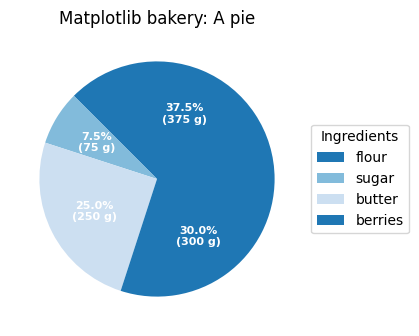

In [112]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

recipe = ["375 g flour",
          "75 g sugar",
          "250 g butter",
          "300 g berries"]

data = [float(x.split()[0]) for x in recipe]
ingredients = [x.split()[-1] for x in recipe]


def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d} g)"


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, ingredients,
          title="Ingredients",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Matplotlib bakery: A pie")

plt.show()

# 6. Visuales

Para visualizar, algunos datos se deben colocar en arreglos de manera que puedan ser procesadas por la herramienta de visualizacion

In [115]:
from matplotlib import pyplot as plt


[np.float64(1150880400.0), np.float64(1116343500.0), np.float64(1098019600.0), np.float64(1038375700.0)]


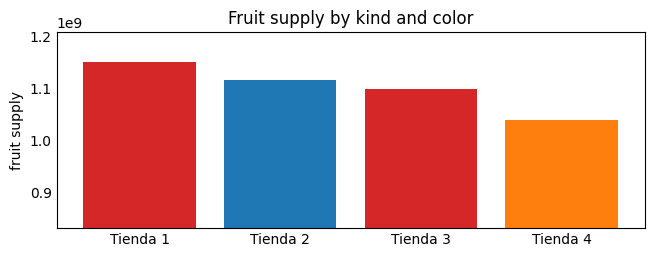

In [130]:
#Ingresos tiendas
ingreso_tiendas =[ingreso_tienda1,ingreso_tienda2,ingreso_tienda3,ingreso_tienda4]
print(ingreso_tiendas)
fig, ax = plt.subplots(figsize=(6, 2))

tiendas = ['Tienda 1','Tienda 2','Tienda 3','Tienda 4']
counts = [40, 100, 30, 55]
# bar_labels = ['red', 'blue', '_red', 'orange']
bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

ax.bar(tiendas, ingreso_tiendas, color=bar_colors)
plt.ylim(ymin=min(ingreso_tiendas)*0.8)
ax.set_ylabel('fruit supply')
ax.set_title('Fruit supply by kind and color')
# ax.legend(title='Fruit color')


plt.show()